In [2]:
import pandas as pd
mimic=pd.read_csv('zevac_data.csv', sep='\t', usecols = ['patient_id', 'admission_id', 'age', 'sex', 'sc_date',
       'sample_type', 'bacteria_name', 'antibiotic_name', 'num_prev_adm',
       'interval', 'device', 'hai', 'susceptibility', 'comorbidity'])

#### Sample Distribution Pie Chart 

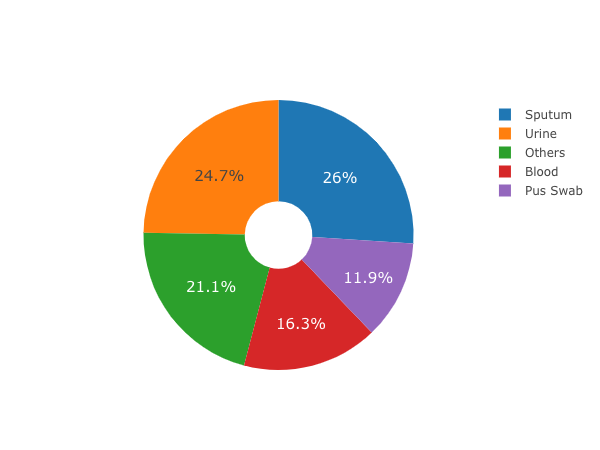

In [59]:
from plotly import graph_objs as go
import plotly.io as pio
png_renderer = pio.renderers["png"]

samples = mimic.sample_type.unique()
mimicSampleCounts = pd.DataFrame(columns=['sample_type', 'isolates'])
def count(sample):
    filtered = mimic[mimic.sample_type==sample][['patient_id', 'admission_id', 'sc_date','bacteria_name']].drop_duplicates().shape[0]
    return filtered
mimicSampleCounts.sample_type = pd.Series(samples)
mimicSampleCounts.isolates = mimicSampleCounts.sample_type.apply(lambda x: count(x))
mimicSampleCounts = mimicSampleCounts.sort_values(by=['isolates'], ascending=False).reset_index(drop=True)
mimicSampleCounts.loc[(mimicSampleCounts.sample_type=='Catheter Tip') & (mimicSampleCounts.isolates==1193)] = 'Others', mimicSampleCounts.iloc[4:].isolates.sum()
mimicSampleCounts = mimicSampleCounts.iloc[0:5]
fig = go.Figure(data=[go.Pie(labels=mimicSampleCounts.sample_type.tolist(), values=mimicSampleCounts.isolates.tolist(), hole=.25)])
fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors))
fig.show(renderer="png", width=600, height=450)

#### Bacterial Distribution

In [12]:
bacteria = mimic.bacteria_name.unique()
mimicIsolateCounts = pd.DataFrame(columns=['bacteria_name', 'isolates', 'percentage'])
def count(bacteria):
    filtered = mimic[mimic.bacteria_name==bacteria][['patient_id', 'admission_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
mimicIsolateCounts.bacteria_name = pd.Series(bacteria)
mimicIsolateCounts.isolates = mimicIsolateCounts.bacteria_name.apply(lambda x: count(x))
mimicIsolateCounts.percentage = mimicIsolateCounts.isolates.apply(lambda x: 100*(x/sum(mimicIsolateCounts.isolates)))
mimicIsolateCounts = mimicIsolateCounts.sort_values(by=['percentage'], ascending=False)
mimicIsolateCounts

,bacteria_name,isolates,percentage
0,Staphylococcus aureus,7469,27.037104
8,Escherichia coli,3562,12.894118
6,Enterococcus,3485,12.615385
5,Pseudomonas aeruginosa,2877,10.414480
1,Staphylococcus,2368,8.571946
2,Klebsiella pneumoniae,2030,7.348416
9,Enterobacter cloacae,816,2.953846
13,Proteus mirabilis,654,2.367421
3,Stenotrophomonas maltophilia,513,1.857014
23,Serratia marcescens,504,1.824434


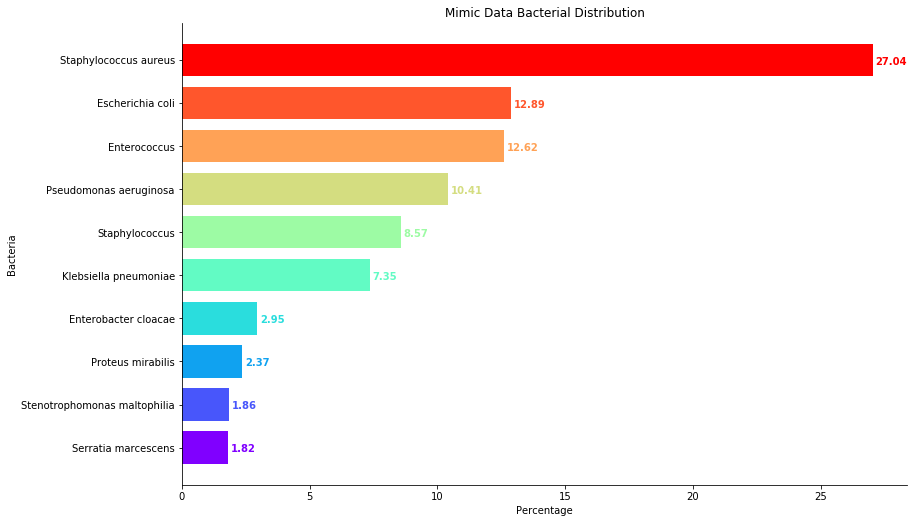

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
top_ten = mimicIsolateCounts[0:10].sort_values(by=['percentage'])
x = top_ten.bacteria_name
y = top_ten.percentage
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('Mimic Data Bacterial Distribution')
plt.xlabel('Percentage')
plt.ylabel('Bacteria')      
plt.show()

In [7]:
mimic.patient_id.nunique()

11496

In [8]:
mimicIsolateCounts.isolates.sum()

27625

#### Gender Distribution

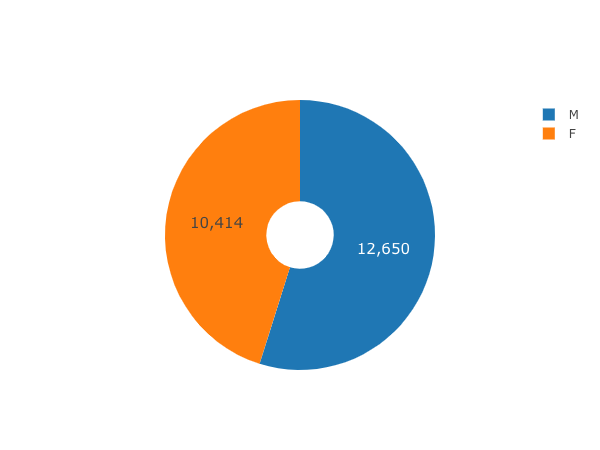

In [60]:
from plotly import graph_objs as go
import plotly.io as pio
png_renderer = pio.renderers["png"]

genders = mimic.sex.unique()
mimicGenderCounts = pd.DataFrame(columns=['sex', 'samples'])
def count(gender):
    filtered = mimic[mimic.sex==gender][['patient_id', 'admission_id', 'sc_date']].drop_duplicates().shape[0]
    return filtered
mimicGenderCounts.sex = pd.Series(genders)
mimicGenderCounts.samples = mimicGenderCounts.sex.apply(lambda x: count(x))
mimicGenderCounts = mimicGenderCounts.sort_values(by=['samples'], ascending=False).reset_index(drop=True)
fig = go.Figure(data=[go.Pie(labels=mimicGenderCounts.sex.tolist(), values=mimicGenderCounts.samples.tolist(), hole=.25)])
fig.update_traces(hoverinfo='label+percent', textfont_size=15, textinfo='value',
                  marker=dict(colors=colors))
fig.show(renderer="png", width=600, height=450)

#### Sensitivity Distribution

In [61]:
tests = mimic.drop_duplicates().reset_index(drop=True)
tests.susceptibility.value_counts()

S    1313845
R     546858
I      73533
Name: susceptibility, dtype: int64

#### Antibiotic and Bacteria and Sample and Device and Comorbidity Unique

In [64]:
mimic.antibiotic_name.nunique()

30

In [67]:
mimic.bacteria_name.nunique()

115

In [68]:
mimic.sample_type.nunique()

27

In [73]:
mimic.device.nunique()

10

In [3]:
com = pd.Series(mimic.comorbidity.unique())
def com_dist(com):
    df = mimic[mimic.comorbidity==com][['patient_id', 'admission_id']].drop_duplicates()
    return df.shape[0]
com_table = pd.DataFrame(columns=['Comorbidity', 'Count'])
com_table.Comorbidity = com
com_table.Count = com_table.Comorbidity.apply(lambda x: com_dist(x))
com_table = com_table.sort_values(by='Count').reset_index(drop=True)

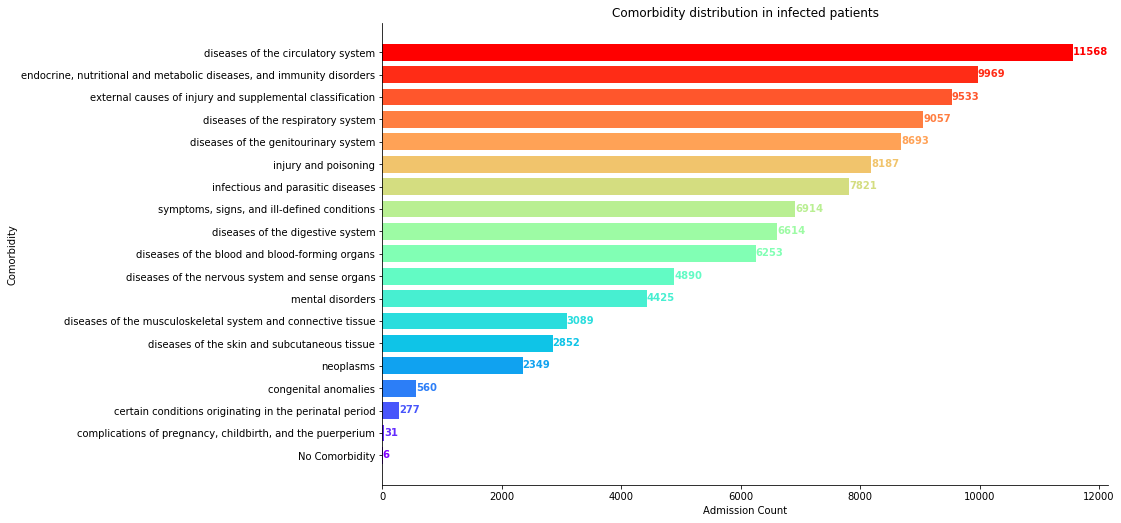

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
x = com_table.Comorbidity
y = com_table.Count
colors = cm.rainbow(np.linspace(0, 1, len(y)))
fig, ax = plt.subplots()
fig.set_size_inches(13, 8.5)
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=colors)
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, v in enumerate(y):
    ax.text(v+.1, i-.1, str(round(v,2)), color=colors[i], fontweight='bold')
plt.title('Comorbidity distribution in infected patients')
plt.xlabel('Admission Count')
plt.ylabel('Comorbidity')      
plt.show()

In [18]:
list(com)

['endocrine, nutritional and metabolic diseases, and immunity disorders',
 'diseases of the blood and blood-forming organs',
 'mental disorders',
 'diseases of the nervous system and sense organs',
 'diseases of the circulatory system',
 'diseases of the genitourinary system',
 'symptoms, signs, and ill-defined conditions',
 'external causes of injury and supplemental classification',
 'infectious and parasitic diseases',
 'diseases of the musculoskeletal system and connective tissue',
 'injury and poisoning',
 'neoplasms',
 'diseases of the respiratory system',
 'diseases of the skin and subcutaneous tissue',
 'diseases of the digestive system',
 'congenital anomalies',
 'certain conditions originating in the perinatal period',
 'complications of pregnancy, childbirth, and the puerperium',
 'No Comorbidity']